In [64]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from scipy import stats



In [3]:
matches    = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

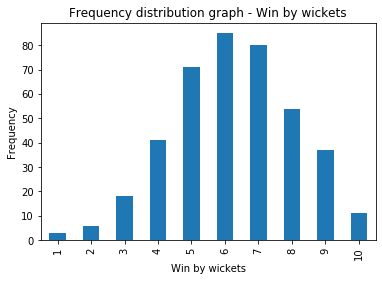

In [12]:
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Frequency")

In [45]:
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()
win_by_wickets_std

1.8256236026762627

In [44]:
win_by_wickets_mean

6.238916256157635

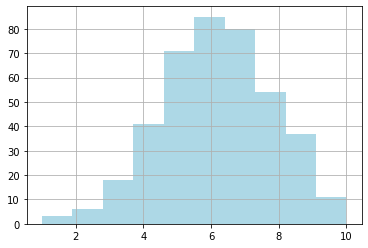

In [16]:
win_by_wickets_data.hist(color='lightblue')

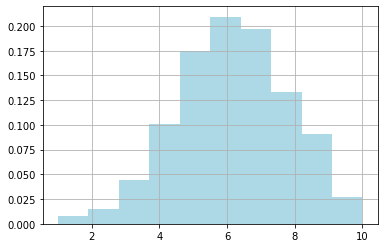

In [17]:
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

In [25]:
print(win_by_wickets_data)

1       7
2      10
3       6
5       9
6       4
       ..
750     6
751     9
752     6
753     2
754     6
Name: win_by_wickets, Length: 406, dtype: int64


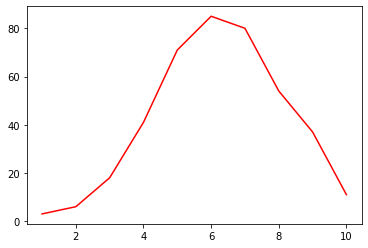

In [23]:
win_by_wickets_data.value_counts(sort=False, normalize=False).plot.line(color='red')

9.99899999999901

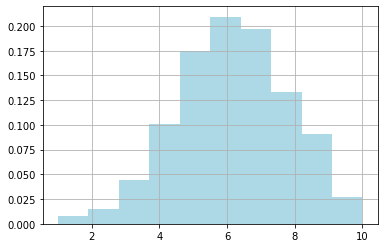

In [34]:
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())
random_data = np.arange(1, 10, 0.001)
random_data.max()
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')

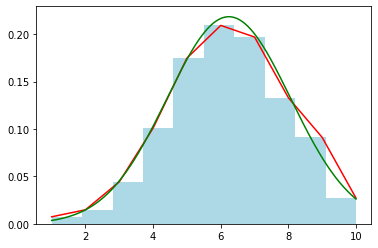

In [50]:
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()

# Plot histogram (normalized) - LIGHT-BLUE
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())
#weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count()
# Plot line graph - RED
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red')

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)

pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')


## Example: If a team wins by a margin of 35 runs, what's the z-score?

In [112]:
#Plotting mean of the sample
sample_means=[]
n =30
for sample in range(0,100):
    sample_value = np.random.choice(a = matches[matches['win_by_runs'] >0].win_by_runs,size = n)
    sample_mean= np.mean(sample_value)
    sample_means.append(sample_mean)

[23 25 10 24 64 23 14 37 10 42 20 22 21 80 86 10 85  2 65 27 27 45 23  5
 24 87 15 19 24 26]


Text(0, 0.5, 'freq')

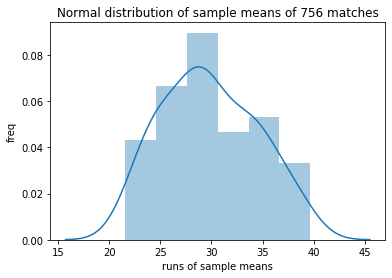

In [113]:
print(sample_value)
sns.distplot(sample_means)
pyplot.title("Normal distribution of sample means of 756 matches")
pyplot.xlabel("runs of sample means")
pyplot.ylabel("freq")

In [137]:
se =win_by_runs_data.std()/np.sqrt(30)
print("Standard Error for 30 samples",se)
print("The sample mean of win_by_runs",np.mean(sample_means))
print("The population mean of win_by_runs",win_by_runs_mean)

Standard Error for 30 samples 4.9809187386790885
The sample mean of win_by_runs 29.833
The population mean of win_by_runs 29.798219584569733


## If a team wins by a margin of 35 runs, what's the z-score?

In [138]:
win_by_runs_data = matches[matches.win_by_runs > 0].win_by_runs
win_by_runs_mean, win_by_runs_std = win_by_runs_data.mean(), win_by_runs_data.std()
z_score_35 = (35 - win_by_runs_mean) / se
z_score = stats.norm.cdf(z_score_35)
print(z_score)
print(f'z-score = {z_score * 100:.2f} percentile')

0.8518363030372831
z-score = 85.18 percentile


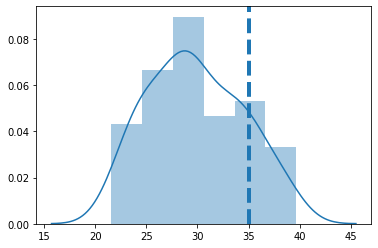

In [120]:
sns.distplot(sample_means)
pyplot.axvline(x=35,linestyle = "--",linewidth= 4, label = "Mean of sample matches")



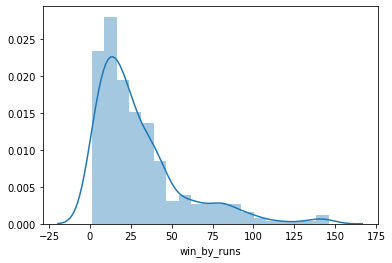

In [122]:
sns.distplot(win_by_runs_data)

In [110]:
(35 - win_by_runs_mean) / se

3.5002324102321842

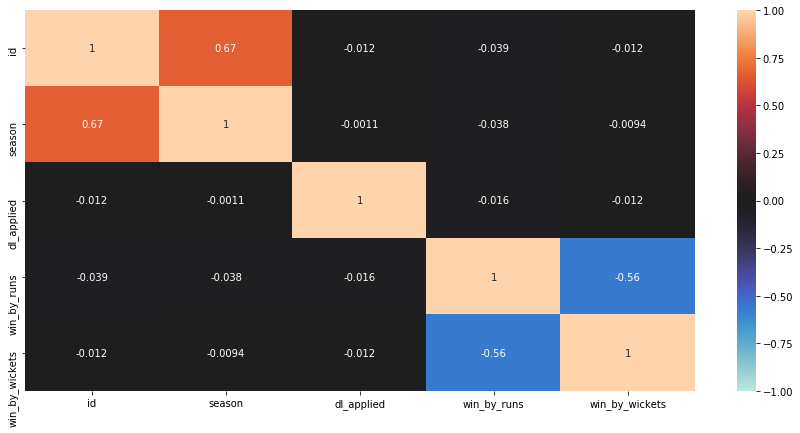

In [65]:
pyplot.figure(figsize=(15,7))
#Heatmap
corr = matches.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center = 0,annot = True)